Configurando biblioteca para plotting, carregando a matriz e vendo sua configuração

In [15]:
graphics_toolkit ("gnuplot"); % required

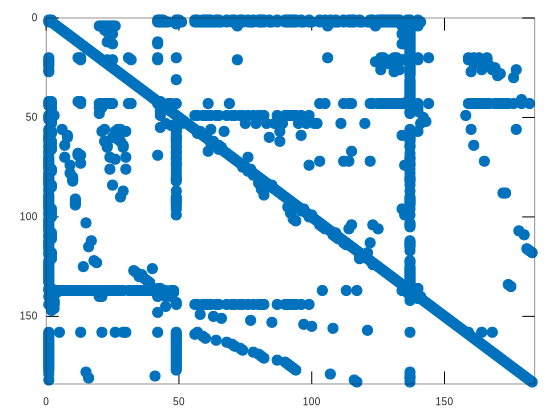

In [16]:
load trab1/arquivos/fs_183_3.mat;
fs183 = Problem.A;
spy(fs183, 10, ".")

## a) Vendo as configurações da matriz

In [17]:
tamanho = size(fs183)
norma = norm(fs183)
condicao = cond(fs183)

tamanho =

   183   183

norma = 1.1519e+09
condicao = 3.2657e+13


## b) Vendo a configuração das suas matrizes de decomposição

In [18]:
[fs183L, fs183U, _, _] = lu(fs183);

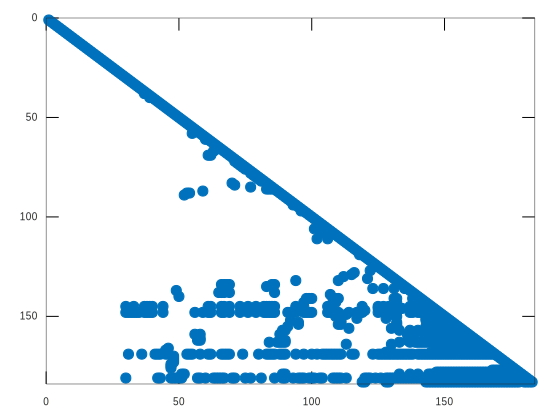

In [19]:
spy(fs183L, 10, ".")

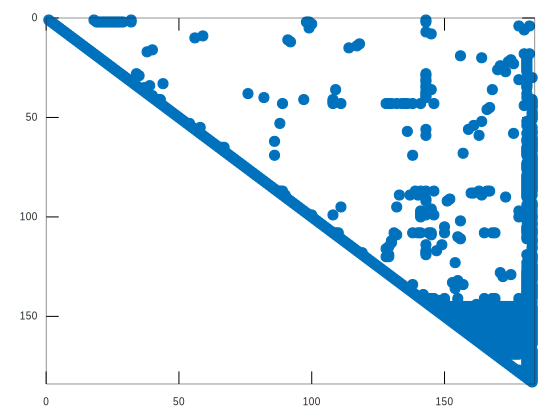

In [20]:
spy(fs183U, 10, ".")

Calculando taxa de preenchimento:

In [21]:
taxa_preenchimento = 100 - nnz(fs183) / ( nnz(fs183L) + nnz(fs183U) ) * 100

taxa_preenchimento = 46.281


## c) Vendo normas de erro e de resíduo em ∞ para métodos diretos:

In [22]:
n = rows(fs183);
fs183b = fs183 * ones(n, 1);
fs183x = fs183 \ fs183b;

norma_erro = norm(ones(n ,1) - fs183x, inf)
norma_residuo = norm(fs183b - fs183 * fs183x, inf)

norma_erro = 4.6673e-05
norma_residuo = 2.9802e-08


## d) Cálculo do raio espectral para as matrizes de iteração dos métodos Gauss-Seidel e Gauss-Jacobi:

Obtendo as matrizes de iteração para os métodos:

In [23]:
source trab1/arquivos/fatora.m

error: 'A' undefined near line 11, column 11
error: called from
    fatora at line 11 column 10


In [24]:
[itJacobi, itSeidel, MSOR] = fatora(fs183, 1);

Calculando o raio espectral para ambas:

In [25]:
[_, lambdaJacobi] = eig(itJacobi);
pJacobi = max(abs(diag(lambdaJacobi)))

[_, lambdaSeidel] = eig(itSeidel);
pSeidel = max(abs(diag(lambdaSeidel)))

pJacobi = 0.9239
pSeidel = 0.8839


ρ(Seidel) = 0.8839. O raio espectral é menor que 1, logo, segundo teorema 1, converge para o método de Gauss-Seidel. Para o método de Gauss-Jacobi, temos que ρ(Jacobi) = 0.9239. Também converge, porém segundo o teorema 1, quanto menor a magnitude do raio espectral, mais rápida a convergência, portanto o método de Gauss-Seidel converge mais rápido.

## e) Dado o decaimento do resíduo, temos que $ tol > 9.3132 $ (???), portanto estipulamos que $ tol= 10e−10 $, e também que $ nmaxiter= 500 $. Foram necessárias $ 311 $ iterações para achar solução na tolerância dada.

In [26]:
source trab1/arquivos/sor.m

error: 'A' undefined near line 16, column 16
error: called from
    sor at line 16 column 11


In [65]:
[x, iter, res] = sor(fs183, fs183b, norma_residuo/2, 500, 1);


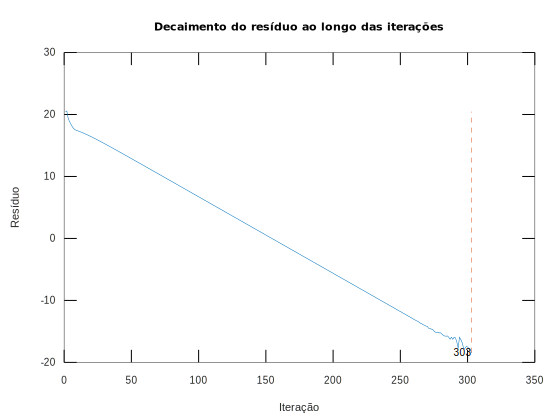

In [73]:
%plot --format svg
plot(log(res))
title("Decaimento do resíduo ao longo das iterações");
xlabel("Iteração");
ylabel("Resíduo");
line([iter iter], [log(res(end)) log(res(1))], "linestyle", "--");
text(iter, log(res(end)), mat2str(iter), "horizontalalignment", "right");
% grid on;

## f) Foi possível encontrar solução mais acurada com o método de Gauss-Seidel, entretanto, foi significativamente mais custoso para encontrar soluções com a tolerância determinada, demandando de poucos minutos, enquanto o método direto levou apenas alguns milissegundos. Em problemas muito grandes, seria recomendado usaro método direto, caso a acurácia não seja tão necessária. O problema ocorre que, como observado na Figura, o método iterativo começa a apresentar comportamento inconsistente após por volta da iteração 280.